<a href="https://colab.research.google.com/github/karou1182001/ProjectsIntroToAI/blob/main/ProjectsIntroToAI/Project2Part1/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK

## PASO 1: Importar librerías (TensorFlow/Keras, NumPy, Matplotlib, sklearn para métricas)
## PASO 2: Cargar dataset (aquí uso CIFAR-10 para demostrar el pipeline)

In [12]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt



#Cargamos los datos
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

## Chequear dimensiones


In [13]:
# Check the shape of the testing data
X_test.shape

(10000, 32, 32, 3)

In [14]:
# Check the shape of the train
X_train.shape

(50000, 32, 32, 3)

In [15]:
# Check the shape of the training labels
y_train.shape

(50000, 1)

In [16]:
# Display the first training labels
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## Reshape and normalize


In [17]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
y_test= y_test.reshape(-1,)

In [19]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

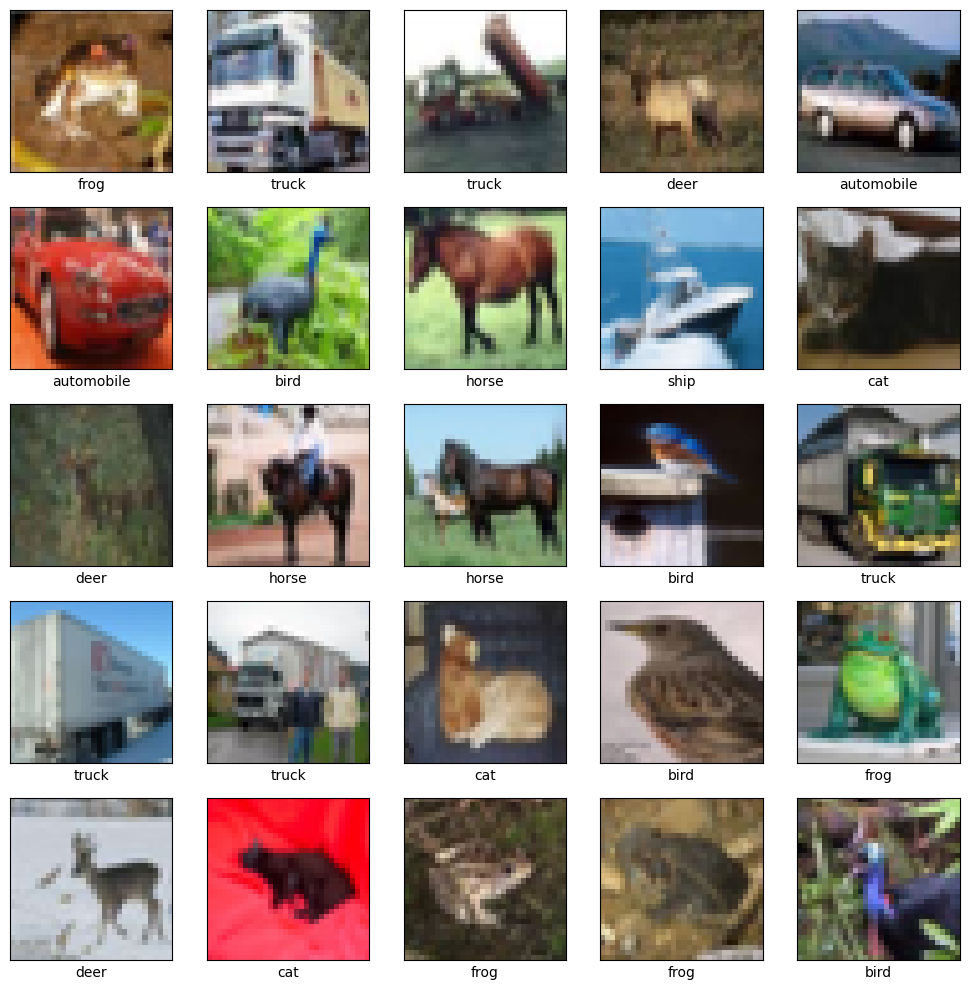

In [20]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime ejemplos
plt.figure(figsize=(10,10))
for i in range(25):
    img = X_train[i]                  # (32,32,3) RGB
    lab = int(y_train[i])             # de (1,) -> int
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(img)                   # sin cmap (es color)
    plt.xlabel(classes[lab])          # o 'clases[lab]' según tu variable
plt.tight_layout()
plt.show()


## PASO 4: Normalizar a rango [0, 1] (dividiendo por 255.0).

In [21]:
#Funcion de normalizacion
X_train= X_train/255.0
X_test= X_test/255.0

## PASO 5: Definir la arquitectura CNN “simple”
         Bloques Conv2D + MaxPooling para extraer características,
         luego Flatten/Dense para clasificar. (También puedo añadir data augmentation.)

## PASO 6: Compilar el modelo
         - Optimizador: Adam
         - Pérdida: sparse_categorical_crossentropy (etiquetas enteras)
         - Métrica: accuracy
##  PASO 7: Entrenar


In [22]:
#Crear el modelo (Ya utiliza capas de convolución y agrupación)
#Cuenta con 1 capa de convolución con 32 núcleos y otra con 64. 2 capas de agrupación.
#Finalmente una capa densa con 100 neuronas
model = models.Sequential([
    layers.Input(shape=(32,32,3)),

    layers.Conv2D(32, (3,3), padding="same", activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), padding="same", activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')    # 10 clases
])


#Compilar el modelo
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5) # Por ahora 5, despues cambiamos a 10

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - accuracy: 0.4102 - loss: 1.6287
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.6310 - loss: 1.0444
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6911 - loss: 0.8886
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.7253 - loss: 0.7889
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 55ms/step - accuracy: 0.7496 - loss: 0.7165


# PASO 8: Evaluar en test
#         - Imprimir loss y accuracy finales en el conjunto de prueba (nunca visto en entrenamiento/validación)


In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6873 - loss: 0.8957


[0.9022786021232605, 0.6880000233650208]

## PASO 9: Métricas por clase
         - Obtener predicciones (argmax)
         - classification_report (precision/recall/F1 por clase)
         - Matriz de confusión correcta (usando confusion_matrix)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_proba = model.predict(X_test)
y_proba[:5]
y_pred = np.argmax(y_proba, axis=1)
 #[np.argmax(element) for element in y_pred]

# 3) Reporte por clase
print("Classification Report:\n",
      classification_report(y_test, y_pred, digits=3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Classification Report:
               precision    recall  f1-score   support

           0      0.735     0.736     0.736      1000
           1      0.799     0.832     0.815      1000
           2      0.566     0.627     0.595      1000
           3      0.469     0.515     0.491      1000
           4      0.683     0.555     0.612      1000
           5      0.565     0.646     0.603      1000
           6      0.902     0.596     0.718      1000
           7      0.682     0.809     0.740      1000
           8      0.781     0.836     0.807      1000
           9      0.829     0.728     0.775      1000

    accuracy                          0.688     10000
   macro avg      0.701     0.688     0.689     10000
weighted avg      0.701     0.688     0.689     10000



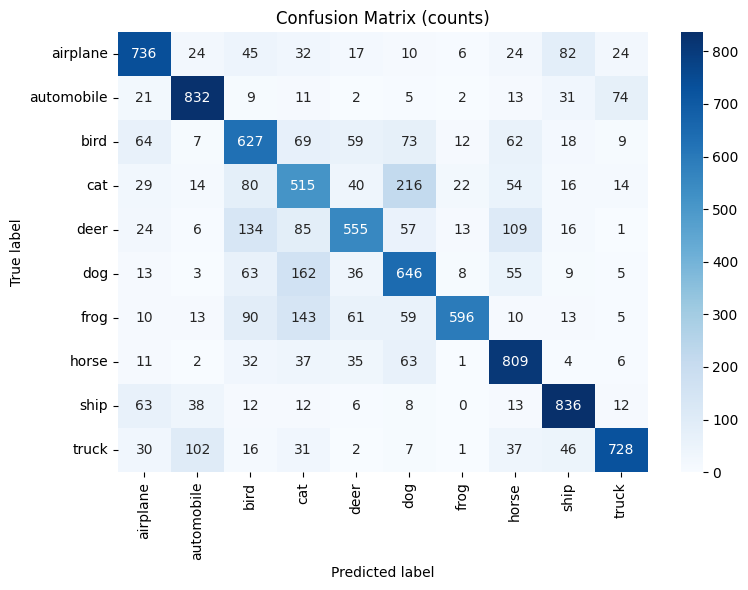

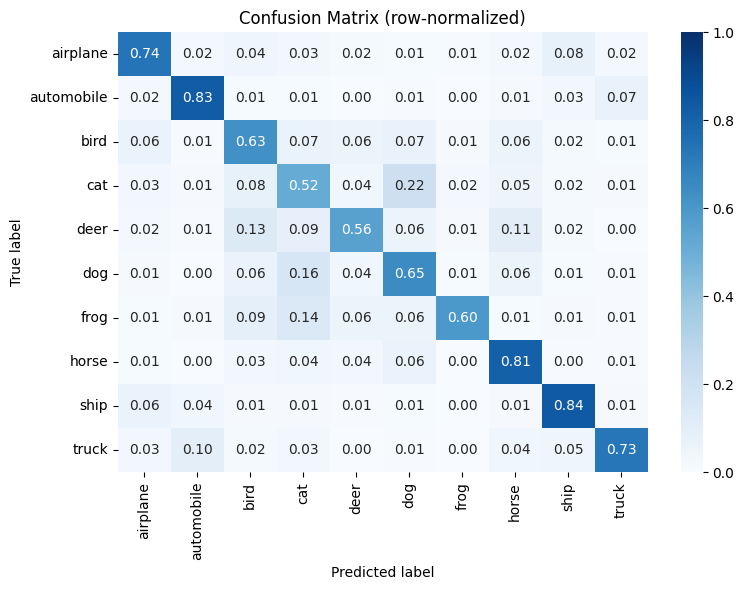

In [25]:
import seaborn as sns

#Matriz de confusión (cuentas)
cm = confusion_matrix(y_test, y_pred, labels=range(10))

# (opcional) nombres de clases
classes = ["airplane","automobile","bird","cat","deer",
           "dog","frog","horse","ship","truck"]

# 5) Plot matriz de confusión (cuentas)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix (counts)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# 6) Plot matriz de confusión normalizada por fila
cm_norm = cm / cm.sum(axis=1, keepdims=True)
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=classes, yticklabels=classes, vmin=0, vmax=1)
plt.title("Confusion Matrix (row-normalized)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()


#model.save("cnn_simple_cifar10.h5")
